In [1]:
import os
import pandas as pd
import sae_bench.sae_bench_utils.graphing_utils as graphing_utils
from sae_bench.sae_bench_utils.graphing_utils import get_eval_results, get_core_results

['kl_div_score', 'kl_div_with_ablation', 'kl_div_with_sae', 'ce_loss_score', 'ce_loss_with_ablation', 'ce_loss_with_sae', 'ce_loss_without_sae', 'explained_variance', 'explained_variance_legacy', 'mse', 'cossim', 'l2_norm_in', 'l2_norm_out', 'l2_ratio', 'relative_reconstruction_bias', 'l0', 'l1', 'total_tokens_eval_reconstruction', 'total_tokens_eval_sparsity_variance', 'freq_over_1_percent', 'freq_over_10_percent', 'normalized_freq_over_1_percent', 'normalized_freq_over_10_percent', 'average_max_encoder_cosine_sim', 'average_max_decoder_cosine_sim', 'frac_alive', 'sae_class']
[0.9812885802469136, 10.125, 0.189453125, 0.9815436241610739, 12.4375, 3.296875, 3.125, 0.828125, 0.6640625, 2.15625, 0.8984375, 153.0, 134.0, 0.875, 0.98046875, 86.73910522460938, 512.0, 409600, 4096000, 0.14459228515625, 0.00189208984375, 0.6084040403366089, 0.09299653023481369, 0.13566336035728455, 0.26989659667015076, 0.9989013671875, 'pruned50']


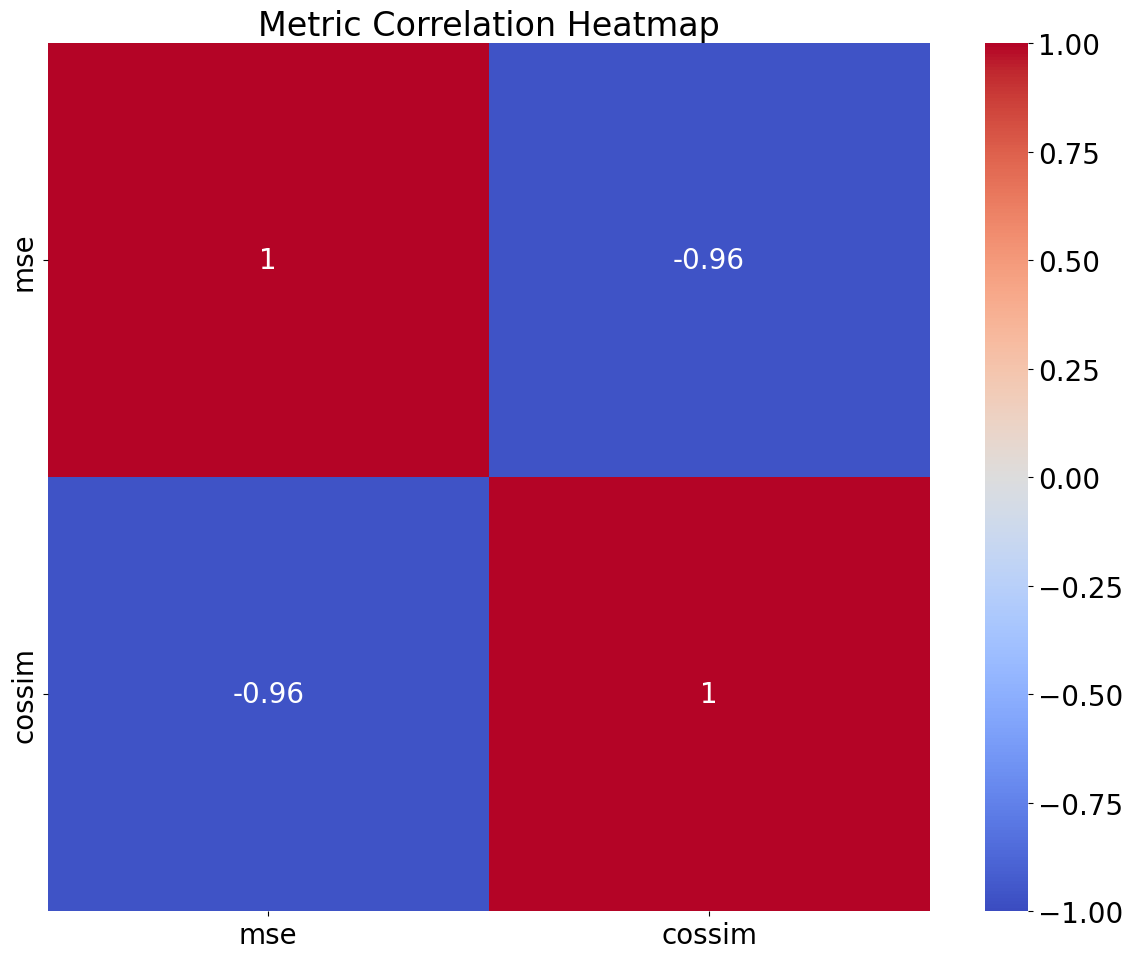

['kl_div_score', 'kl_div_with_ablation', 'kl_div_with_sae', 'ce_loss_score', 'ce_loss_with_ablation', 'ce_loss_with_sae', 'ce_loss_without_sae', 'explained_variance', 'explained_variance_legacy', 'mse', 'cossim', 'l2_norm_in', 'l2_norm_out', 'l2_ratio', 'relative_reconstruction_bias', 'l0', 'l1', 'total_tokens_eval_reconstruction', 'total_tokens_eval_sparsity_variance', 'freq_over_1_percent', 'freq_over_10_percent', 'normalized_freq_over_1_percent', 'normalized_freq_over_10_percent', 'average_max_encoder_cosine_sim', 'average_max_decoder_cosine_sim', 'frac_alive', 'sae_class']
[0.6041666666666666, 0.052734375, 0.0208740234375, 0.6666666666666666, 3.171875, 3.140625, 3.125, 0.5390625, 0.447265625, 0.64453125, 0.73046875, 52.75, 34.5, 0.65625, 0.90234375, 61.98947525024414, 170.0, 409600, 4096000, 0.041015625, 0.00738525390625, 0.6193066835403442, 0.3077481985092163, 0.1485465168952942, 0.15785950422286987, 0.9937744140625, 'pruned50']


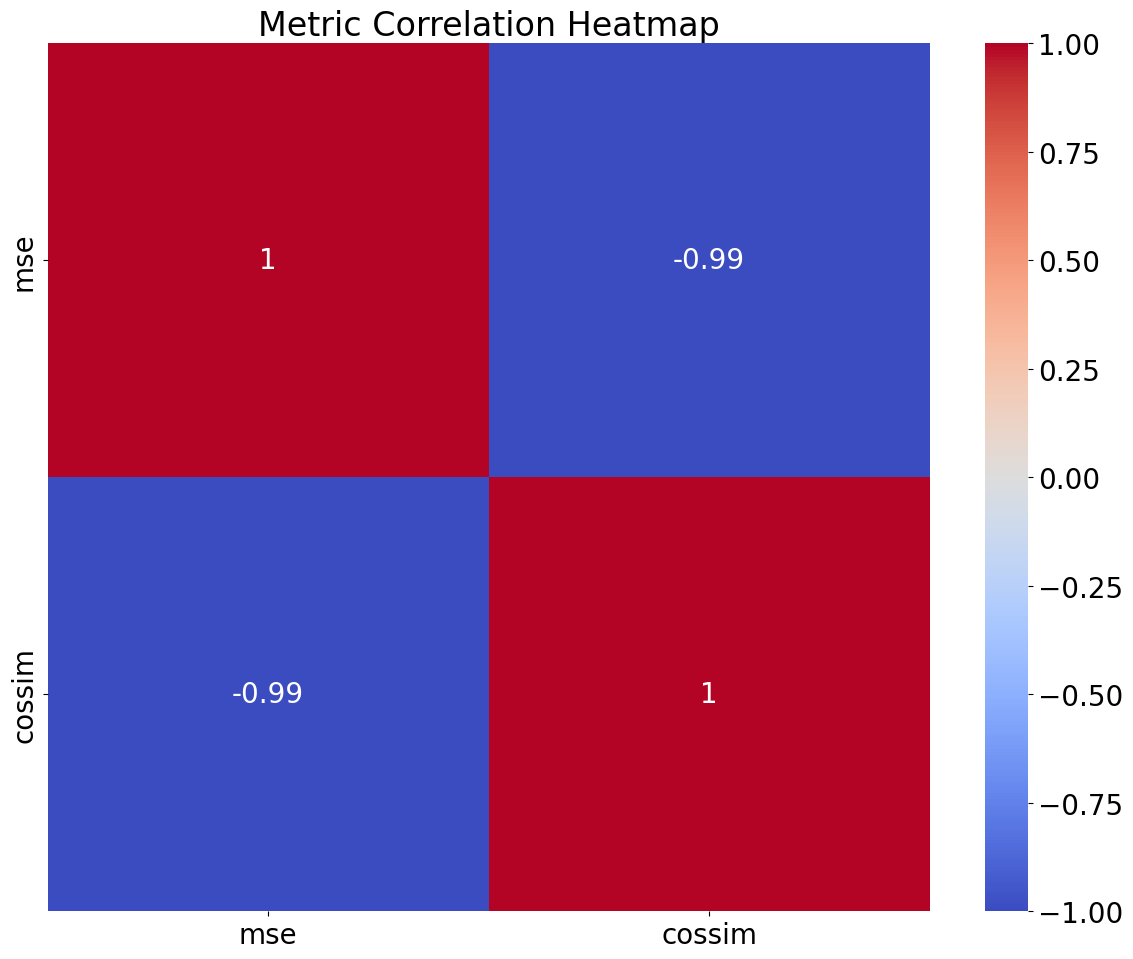

['kl_div_score', 'kl_div_with_ablation', 'kl_div_with_sae', 'ce_loss_score', 'ce_loss_with_ablation', 'ce_loss_with_sae', 'ce_loss_without_sae', 'explained_variance', 'explained_variance_legacy', 'mse', 'cossim', 'l2_norm_in', 'l2_norm_out', 'l2_ratio', 'relative_reconstruction_bias', 'l0', 'l1', 'total_tokens_eval_reconstruction', 'total_tokens_eval_sparsity_variance', 'freq_over_1_percent', 'freq_over_10_percent', 'normalized_freq_over_1_percent', 'normalized_freq_over_10_percent', 'average_max_encoder_cosine_sim', 'average_max_decoder_cosine_sim', 'frac_alive', 'sae_class']
[0.8208333333333333, 0.0439453125, 0.00787353515625, 1.0, 3.171875, 3.125, 3.125, 0.79296875, 0.69921875, 0.037109375, 0.890625, 19.0, 17.375, 0.9140625, 1.03125, 95.78204345703125, 103.5, 409600, 4096000, 0.11431884765625, 0.00946044921875, 0.7265687584877014, 0.34817689657211304, 0.17164811491966248, 0.2875344753265381, 0.962646484375, 'pruned25']


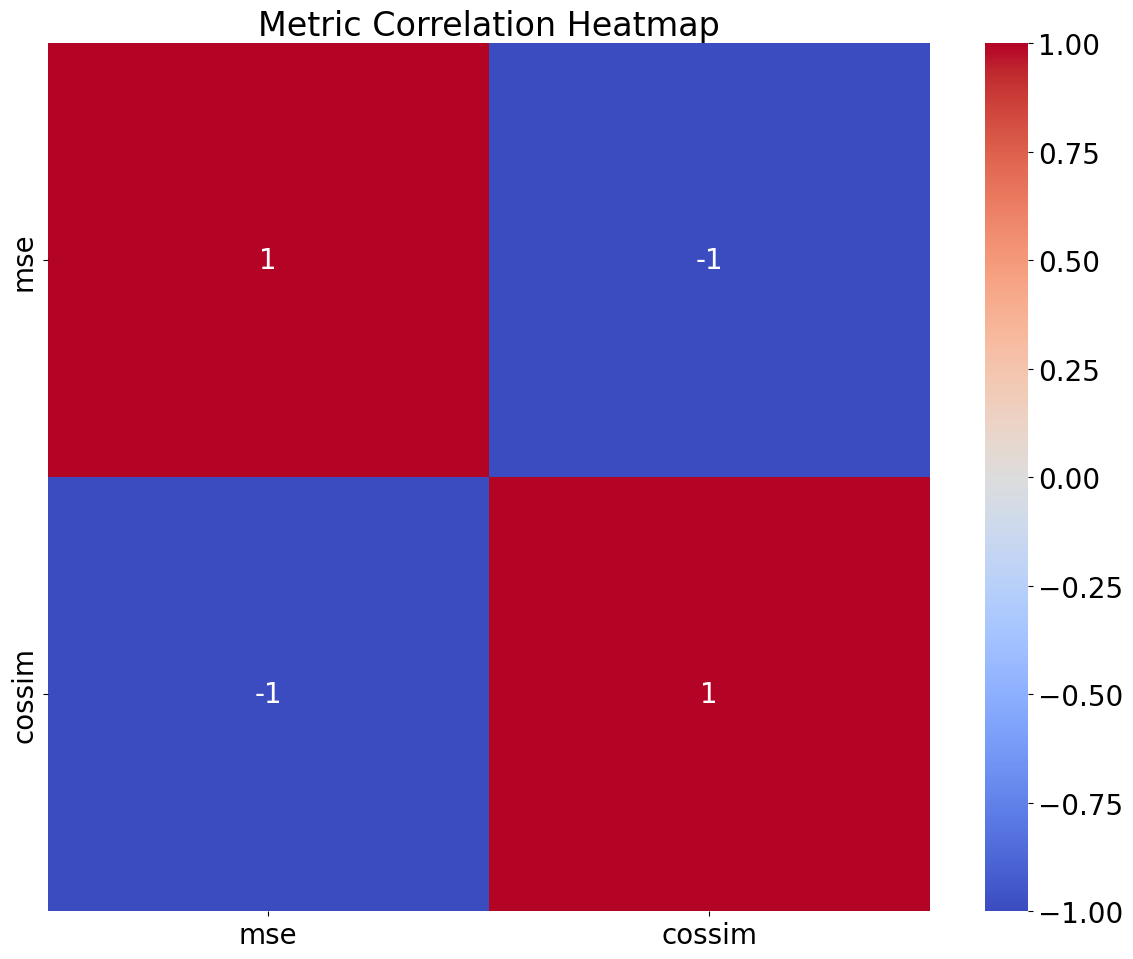

In [11]:
eval_types = ["absorption", "core", "scr", "tpp", "sparse_probing"]
eval_types = ["core"]
eval_types_attn = ["core"]
results_folders = {
    "resid": "/local/scratch/suchit/COLM/eval_results/resid", 
    "mlp": "/local/scratch/suchit/COLM/eval_results/mlp",
    "attn": "/local/scratch/suchit/COLM/eval_results/attn"
    }
path = '/local/scratch/suchit/COLM/result_files'

for results_folder in results_folders:
    for eval_type in eval_types:
        eval_folders = []
        eval_folders.append(f"{results_folders[results_folder]}/{eval_type}")
        eval_filenames = graphing_utils.find_eval_results_files(eval_folders)
        
        eval_results = get_eval_results(eval_filenames)
        entries = []
        
        for eval_result in eval_results:
            entry = []
            keys_for_df = []
            # keys_for_df.append("metric")
            # entry.append(eval_type)

            for e in eval_results[eval_result]:
                if e == "eval_config":
                    continue

                if e == "train_tokens":
                    continue

                if e == "d_sae":
                    continue

                if eval_results[eval_result][e] == None:
                    entry.append(0)
                else:   
                    entry.append(eval_results[eval_result][e])
                
                # print(e, eval_results[eval_result][e])
                keys_for_df.append(e)

            print(keys_for_df)
            print(entry) 
            entries.append(entry)
            break

        custom_metric = "explained_variance"
        metric_keys = [
            "mse",
            "cossim",
            # "explained_variance",
        ]

        graphing_utils.plot_correlation_heatmap(
            eval_results, metric_names=metric_keys, ae_names=None
        )
        
        # for i in range(len(entries)):
        #     assert len(entries[i]) == len(keys_for_df)

        # df = pd.DataFrame(entries, columns=keys_for_df)
        # df = df.round(3)
        
        # if not df.empty:
        #     os.makedirs(f"{path}/{results_folder}", exist_ok=True)

        #     df_pivoted = df.set_index('sae_class').T
        #     df_pivoted.reset_index(inplace=True)
        #     df_pivoted.rename(columns={'index': 'metric'}, inplace=True)
        #     df_pivoted.to_csv(f"{path}/{results_folder}/{eval_type}.csv", index=False)
        #     # Round numeric columns to 3 decimals
           
        #     # Convert to LaTeX and write to file
        #     latex_code = df_pivoted.to_latex(index=False, float_format="%.3f", caption=f"{results_folder} output - {eval_type}", label=f"tab:{results_folder}_{eval_type}")

        #     # Write to a .tex file
        #     with open(f"{path}/{results_folder}/{eval_type}.tex", "w") as f:
        #         f.write(latex_code)


In [1]:
import os
import pandas as pd
import sae_bench.sae_bench_utils.graphing_utils as graphing_utils
from sae_bench.sae_bench_utils.graphing_utils import get_eval_results, get_core_results

eval_types = ["core"]
results_folders = {
    "resid": "/local/scratch/suchit/COLM/test/eval_results/resid", 
    "mlp": "/local/scratch/suchit/COLM/test/eval_results/mlp",
    "attn": "/local/scratch/suchit/COLM/test/eval_results/attn"
    }
path = '/local/scratch/suchit/COLM/test/result_files'

for results_folder in results_folders:
    for layer in range(12):
        for eval_type in eval_types:
            eval_folders = []
            eval_folders.append(f"{results_folders[results_folder]}/{eval_type}")
            eval_filenames = graphing_utils.find_eval_results_files(eval_folders)
            eval_files = []
            for eval_filename in eval_filenames:
                if f'blocks.{layer}' in eval_filename:
                    eval_files.append(eval_filename)

            path = f'/local/scratch/suchit/COLM/test/result_files/{layer}'
            os.makedirs(path, exist_ok=True)
            eval_results = get_eval_results(eval_files)
            entries = []

            for eval_result in eval_results:
                entry = []
                keys_for_df = []
                keys_for_df.append("metric")
                entry.append(eval_type)

                for e in eval_results[eval_result]:
                    if e == "eval_config":
                        continue

                    if e == "train_tokens":
                        continue

                    if e == "d_sae":
                        continue

                    if eval_results[eval_result][e] == None:
                        entry.append(0)
                    else:   
                        entry.append(eval_results[eval_result][e])
                    
                    # print(e, eval_results[eval_result][e])
                    keys_for_df.append(e)

                print(len(entry), len(keys_for_df))
                entries.append(entry)
            
            for i in range(len(entries)):
                assert len(entries[i]) == len(keys_for_df)

            df = pd.DataFrame(entries, columns=keys_for_df)
            df = df.round(3)
            
            if not df.empty:
                os.makedirs(f"{path}/{results_folder}", exist_ok=True)

                df_pivoted = df.set_index('sae_class').T
                df_pivoted.reset_index(inplace=True)
                df_pivoted.rename(columns={'index': 'metric'}, inplace=True)
                df_pivoted.to_csv(f"{path}/{results_folder}/{eval_type}.csv", index=False)
                # Round numeric columns to 3 decimals
            
                # Convert to LaTeX and write to file
                latex_code = df_pivoted.to_latex(index=False, float_format="%.3f", caption=f"{results_folder} output - {eval_type}", label=f"tab:{results_folder}_{eval_type}")

                # Write to a .tex file
                with open(f"{path}/{results_folder}/{eval_type}.tex", "w") as f:
                    f.write(latex_code)

/eval_results/resid/core/gpt2-small-resid-post-v5-32k_blocks.0.hook_resid_post_eval_results.json
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-pruned-sae-openwebtext_0.25_blocks.0.hook_resid_post_eval_results.json
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-pruned-sae-openwebtext_blocks.0.hook_resid_post_eval_results.json
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-pruned-sae-openwebtext_0.5_blocks.0.hook_resid_post_eval_results.json
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-trained-sae-openwebtext-wanda_gpt2-small-blocks.0.hook_resid_post-standard-mycfg_eval_results.json
28 28
28 28
28 28
28 28
28 28
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-pruned-sae-openwebtext_0.25_blocks.10.hook_resid_post_eval_results.json
/eval_results/resid/core/suchitg_sae-compression-gpt-2-small-pruned-sae-openwebtext_0.5_blocks.10.hook_resid_post_eval_results.json
/eval_results/resid/core/gpt2-small-resid-post-v5-32k_bloc

DEBUG: get_custom_metric_key_and_name absorption 5
{'suchitg_sae-compression-gemma-2-2b-pruned-sae-pile-0.5_blocks.12.hook_mlp_out': {'mean_absorption_fraction_score': 0.20782638039626525, 'mean_full_absorption_score': 0.02424662847940776, 'mean_num_split_features': 1.1923076923076923, 'std_dev_absorption_fraction_score': 0.2814139154570499, 'std_dev_full_absorption_score': 0.026483764644929, 'std_dev_num_split_features': 0.6336706254344299, 'eval_config': {'model_name': 'gemma-2-2b', 'random_seed': 42, 'f1_jump_threshold': 0.03, 'max_k_value': 10, 'prompt_template': '{word} has the first letter:', 'prompt_token_pos': -6, 'llm_batch_size': 32, 'llm_dtype': 'bfloat16', 'k_sparse_probe_l1_decay': 0.01, 'k_sparse_probe_batch_size': 4096, 'k_sparse_probe_num_epochs': 50}, 'sae_class': 'pruned50', 'd_sae': '16k', 'train_tokens': 1e-06, 'l0': 61.98947525024414, 'ce_loss_score': 0.6666666666666666}, 'suchitg_sae-compression-gemma-2-2b-trained-sae-pile-wanda_blocks.12.hook_mlp_out': {'mean_abs

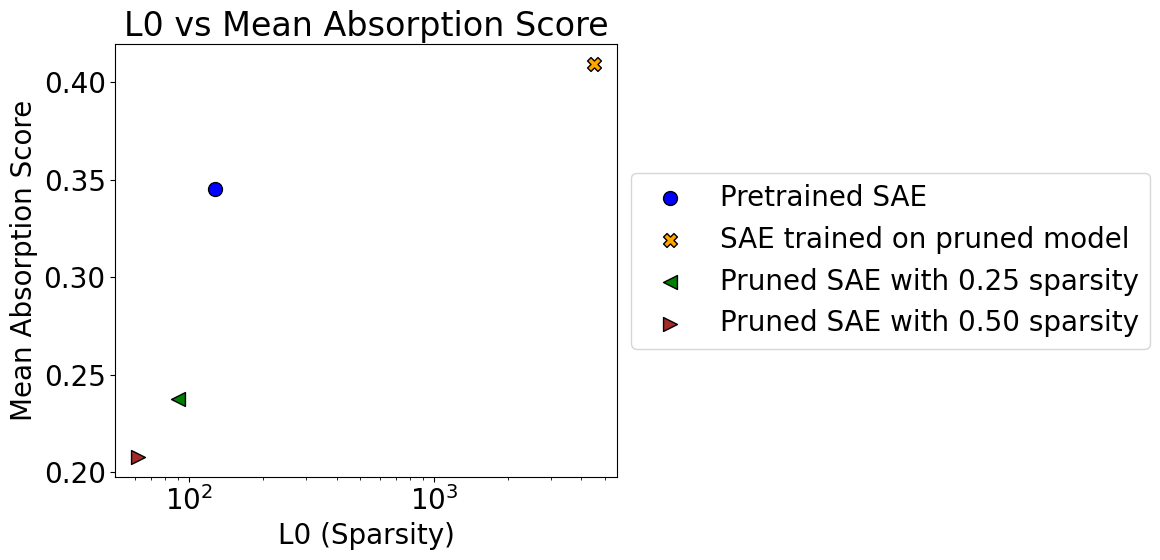

DEBUG: get_custom_metric_key_and_name core 5
{'suchitg_sae-compression-gemma-2-2b-pruned-sae-pile-0.5_blocks.12.hook_mlp_out': {'kl_div_score': 0.6041666666666666, 'kl_div_with_ablation': 0.052734375, 'kl_div_with_sae': 0.0208740234375, 'ce_loss_score': 0.6666666666666666, 'ce_loss_with_ablation': 3.171875, 'ce_loss_with_sae': 3.140625, 'ce_loss_without_sae': 3.125, 'explained_variance': 0.5390625, 'explained_variance_legacy': 0.447265625, 'mse': 0.64453125, 'cossim': 0.73046875, 'l2_norm_in': 52.75, 'l2_norm_out': 34.5, 'l2_ratio': 0.65625, 'relative_reconstruction_bias': 0.90234375, 'l0': 61.98947525024414, 'l1': 170.0, 'total_tokens_eval_reconstruction': 409600, 'total_tokens_eval_sparsity_variance': 4096000, 'freq_over_1_percent': 0.041015625, 'freq_over_10_percent': 0.00738525390625, 'normalized_freq_over_1_percent': 0.6193066835403442, 'normalized_freq_over_10_percent': 0.3077481985092163, 'average_max_encoder_cosine_sim': 0.1485465168952942, 'average_max_decoder_cosine_sim': 0.1

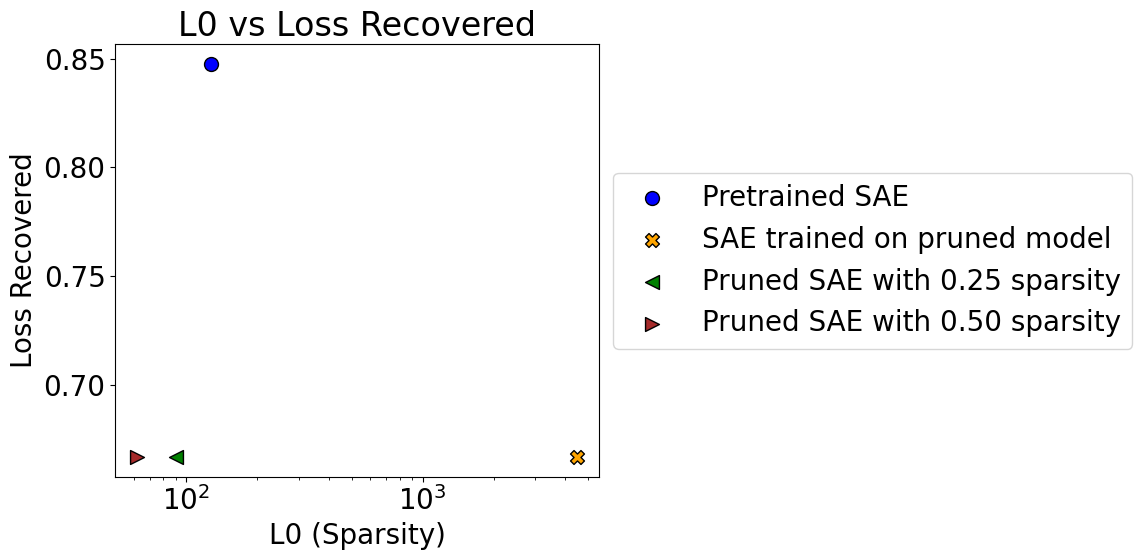

DEBUG: get_custom_metric_key_and_name scr 5
{'suchitg_sae-compression-gemma-2-2b-pruned-sae-pile-0.5_blocks.12.hook_mlp_out': {'scr_dir1_threshold_2': 0.09654530303916414, 'scr_metric_threshold_2': 0.019181702051588603, 'scr_dir2_threshold_2': 0.014690110404719198, 'scr_dir1_threshold_5': 0.09434546417642078, 'scr_metric_threshold_5': 0.027886018951076362, 'scr_dir2_threshold_5': 0.03283320833810837, 'scr_dir1_threshold_10': 0.09253478282445739, 'scr_metric_threshold_10': 0.029969233091352014, 'scr_dir2_threshold_10': 0.03597969254417636, 'scr_dir1_threshold_20': 0.11170140723141292, 'scr_metric_threshold_20': 0.03528929338289344, 'scr_dir2_threshold_20': 0.055217709820989405, 'scr_dir1_threshold_50': 0.07222689856370051, 'scr_metric_threshold_50': 0.050280790964988074, 'scr_dir2_threshold_50': 0.07674511164104204, 'scr_dir1_threshold_100': 0.07811256280599178, 'scr_metric_threshold_100': 0.0482507054814066, 'scr_dir2_threshold_100': 0.09760172943110147, 'scr_dir1_threshold_500': 0.006

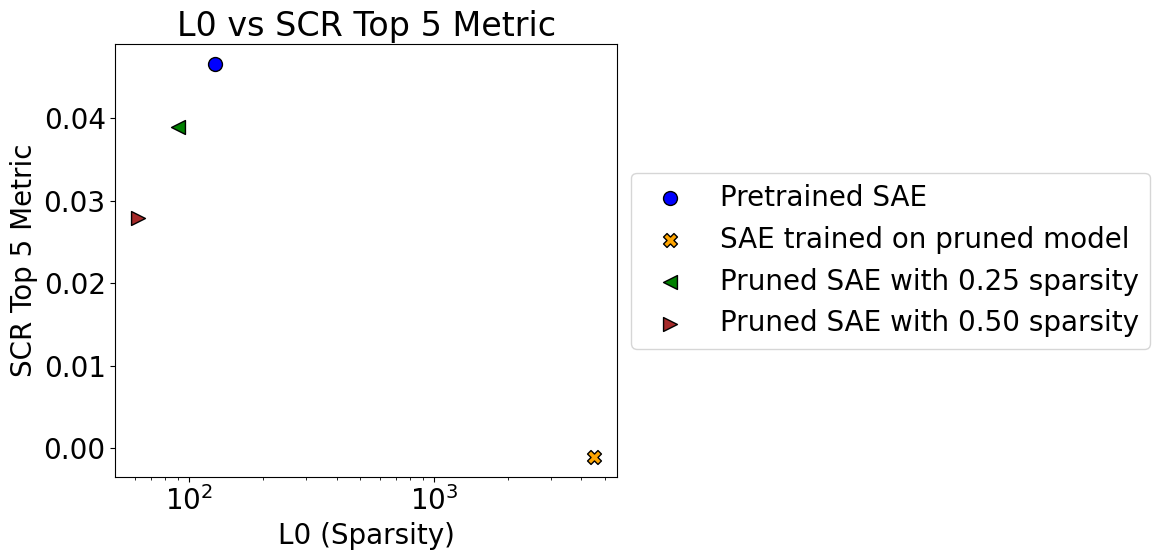

DEBUG: get_custom_metric_key_and_name tpp 5
{'suchitg_sae-compression-gemma-2-2b-pruned-sae-pile-0.5_blocks.12.hook_mlp_out': {'tpp_threshold_2_total_metric': 0.0043000027537345884, 'tpp_threshold_2_intended_diff_only': 0.0054000020027160645, 'tpp_threshold_2_unintended_diff_only': 0.0010999992489814758, 'tpp_threshold_5_total_metric': 0.010149995982646943, 'tpp_threshold_5_intended_diff_only': 0.011699992418289184, 'tpp_threshold_5_unintended_diff_only': 0.0015499964356422424, 'tpp_threshold_10_total_metric': 0.013800010085105896, 'tpp_threshold_10_intended_diff_only': 0.015900003910064697, 'tpp_threshold_10_unintended_diff_only': 0.0020999938249588014, 'tpp_threshold_20_total_metric': 0.02642500549554825, 'tpp_threshold_20_intended_diff_only': 0.030699998140335083, 'tpp_threshold_20_unintended_diff_only': 0.004274992644786835, 'tpp_threshold_50_total_metric': 0.0628499910235405, 'tpp_threshold_50_intended_diff_only': 0.06919999122619629, 'tpp_threshold_50_unintended_diff_only': 0.006

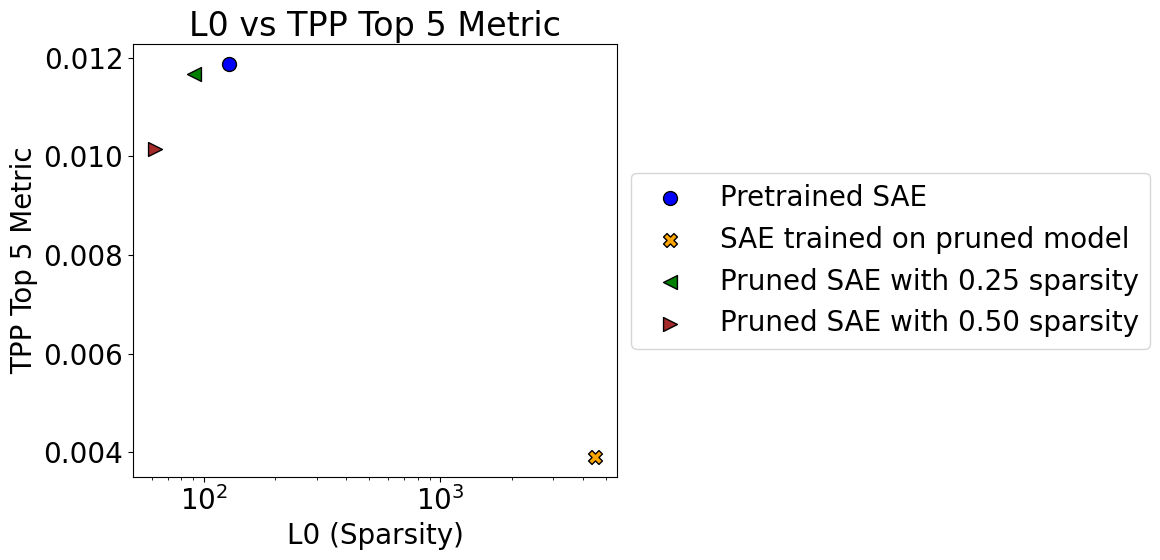

DEBUG: get_custom_metric_key_and_name sparse_probing 5
{'suchitg_sae-compression-gemma-2-2b-pruned-sae-pile-0.5_blocks.12.hook_mlp_out': {'sae_test_accuracy': 0.9371375512331724, 'sae_top_1_test_accuracy': 0.70339375, 'sae_top_2_test_accuracy': 0.75850625, 'sae_top_5_test_accuracy': 0.821725, 'sae_top_10_test_accuracy': None, 'sae_top_20_test_accuracy': None, 'sae_top_50_test_accuracy': None, 'sae_top_100_test_accuracy': None, 'eval_config': {'random_seed': 42, 'dataset_names': ['LabHC/bias_in_bios_class_set1', 'LabHC/bias_in_bios_class_set2', 'LabHC/bias_in_bios_class_set3', 'canrager/amazon_reviews_mcauley_1and5', 'canrager/amazon_reviews_mcauley_1and5_sentiment', 'codeparrot/github-code', 'fancyzhx/ag_news', 'Helsinki-NLP/europarl'], 'probe_train_set_size': 4000, 'probe_test_set_size': 1000, 'context_length': 128, 'sae_batch_size': 125, 'llm_batch_size': 32, 'llm_dtype': 'bfloat16', 'model_name': 'gemma-2-2b', 'k_values': [1, 2, 5], 'lower_vram_usage': False}, 'sae_class': 'pruned50

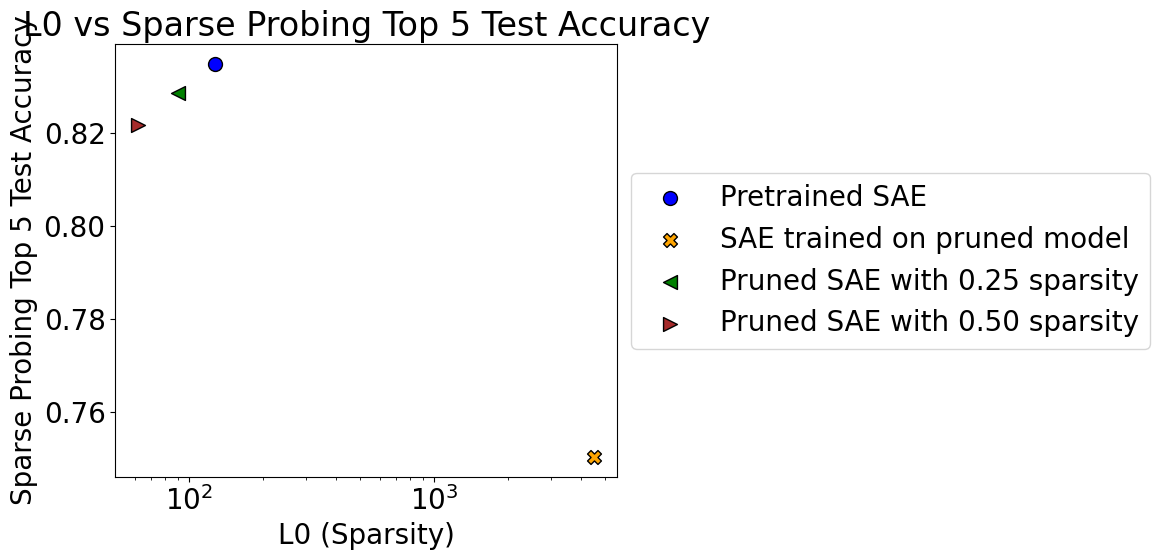

In [4]:
eval_types = ["absorption", "core", "scr", "tpp", "sparse_probing"]
results_folders = ["/local/scratch/suchit/COLM/eval_results/resid"]
results_folders = ["/local/scratch/suchit/COLM/eval_results/mlp"]
image_path = "/local/scratch/suchit/COLM/images"
trainer_markers = {
    "pretrained": "o",
    "trained": "X",
    "pruned25": "<",
    "pruned50": ">"
    }

trainer_colors = {   
    "pretrained": "blue",
    "trained": "orange",
    "pruned25": "green",
    "pruned50": "brown"
    }


for eval_type in eval_types:
    eval_folders = []
    core_folders = []
    for results_folder in results_folders:
        eval_folders.append(f"{results_folder}/{eval_type}")
        core_folders.append(f"{results_folder}/core")

    eval_filenames = graphing_utils.find_eval_results_files(eval_folders)
    core_filenames = graphing_utils.find_eval_results_files(core_folders)

    # print(f"eval_filenames: {eval_filenames}")
    # print(f"core_filenames: {core_filenames}")

    graphing_utils.plot_results(
        eval_filenames,
        core_filenames,
        eval_type,
        os.path.join(image_path, eval_type),
        k=5,
        trainer_markers=trainer_markers,
        trainer_colors=trainer_colors,
    )